<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [14]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [15]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [16]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  y = phi0 + phi1*x

  return y

In [17]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

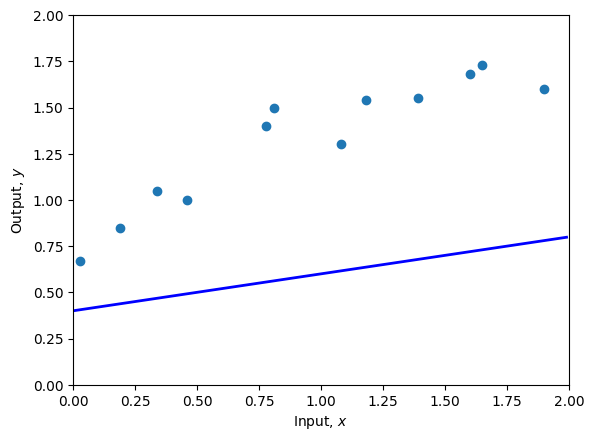

In [18]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [19]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  # TODO Replace this line with the loss calculation (equation 2.5)
  loss = 0
  for i in range(len(x)):
    loss += (y[i] - (phi0 + phi1*x[i]))**2

  return loss

In [20]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


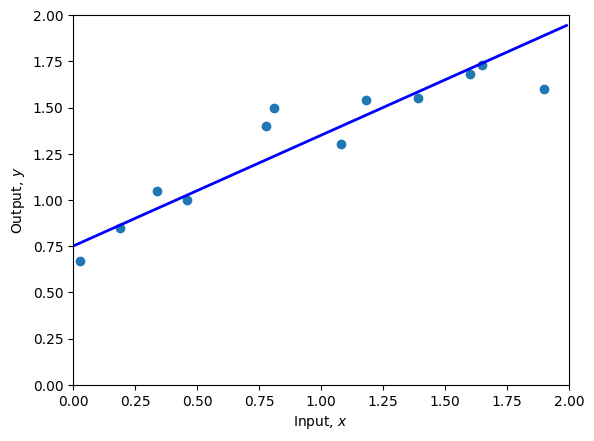

Your Loss = 0.23, Ground truth =10.28


In [21]:
# Set the intercept and slope as in figure 2.2c
phi0 = 0.75 ; phi1 =0.6

# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

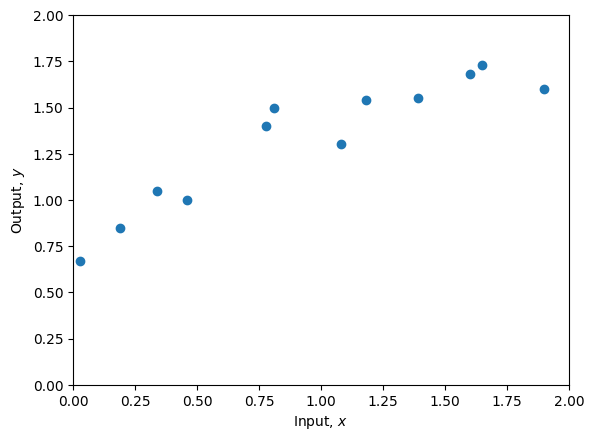

Your Loss = 759.59


In [22]:
# TO DO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 10 ; phi1 =-0.8

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

# Visualizing the loss function

The above process is equivalent to to descending coordinate wise on the loss function<br>

Now let's plot that function

In [23]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,10.0,0.02), np.arange(-5.0,5.0,0.02))
x

array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.6 , 1.65,
       1.9 ])

In [24]:

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])
all_losses

array([[ 570.2638    ,  567.3518    ,  564.4494    , ...,  306.2574    ,
         308.1166    ,  309.9854    ],
       [ 566.57683284,  563.67396084,  560.78068884, ...,  307.10704884,
         308.97537684,  310.85330484],
       [ 562.90187536,  560.00813136,  557.12398736, ...,  307.96870736,
         309.84616336,  311.73321936],
       ...,
       [ 218.10623956,  219.73085556,  221.36507156, ..., 2208.79799156,
        2215.19380756, 2221.59922356],
       [ 220.38808336,  222.02182736,  223.66517136, ..., 2215.61645136,
        2222.02139536, 2228.43593936],
       [ 222.68193684,  224.32480884,  225.97728084, ..., 2222.44692084,
        2228.86099284, 2235.28466484]])

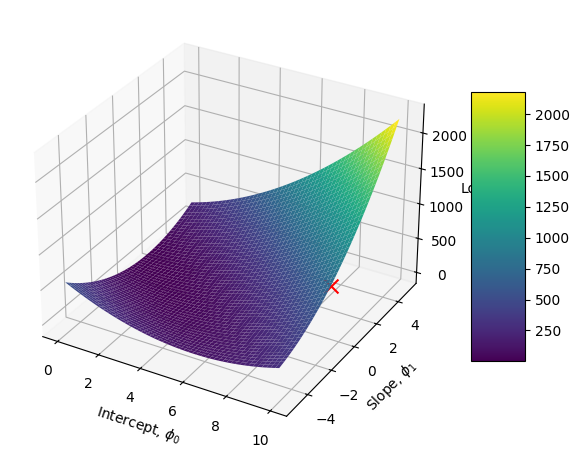

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss function as a 3D surface
surf = ax.plot_surface(phi0_mesh, phi1_mesh, all_losses, cmap='viridis', edgecolor='none')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


ax.set_xlabel('Intercept, $\phi_0$')
ax.set_ylabel('Slope, $\phi_1$')
ax.set_zlabel   ('Loss')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.scatter(phi0, phi1, compute_loss(x,y,phi0,phi1), c='r', s=100, marker='x')



plt.show()

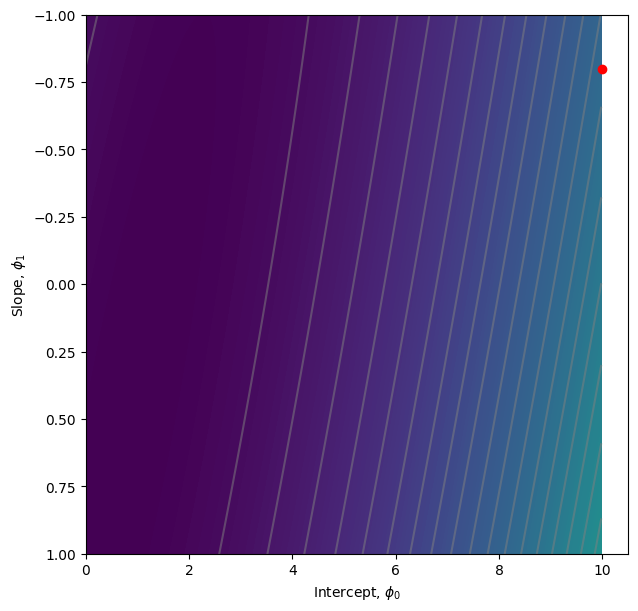

In [26]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel('Intercept, $\phi_0$')
ax.set_ylabel('Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()